# RANDOM FOREST ASSIGNMENT | Stroke Prediction Dataset

## Introduction of the Dataset

The Stroke Prediction Dataset contains 5,110 entries with 12 features. It includes demographic, health, and lifestyle factors such as age, gender, hypertension, heart disease, and smoking status. The target variable is whether an individual has had a stroke. Notably, the bmi column has some missing values, which will need addressing. The dataset provides a comprehensive view of factors associated with stroke risk and is suitable for developing predictive models.

Total Entries: 5110

Columns:

- id: Unique identifier for each entry (int64)
- gender: Gender of the individual (object)
- age: Age of the individual (float64)
- hypertension: Indicates if the individual has hypertension (int64, 0 or 1)
- heart_disease: Indicates if the individual has heart disease (int64, 0 or 1)
- ever_married: Marital status of the individual (object)
- work_type: Type of work the individual is involved in (object)
- Residence_type: Type of residence (urban/rural) (object)
- avg_glucose_level: Average glucose level in the blood (float64)
- bmi: Body Mass Index of the individual (float64, with some missing values)
- smoking_status: Smoking status of the individual (object)
- stroke: Target variable indicating if the individual has had a stroke (int64, 0 or 1)

## Import Libraries

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [71]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Basic Information of dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Summary of the dataset

In [73]:
df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


## Checking Missing values in DataFrame

In [74]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Handling missing values in the 'bmi' column

In [75]:
# Calculate the mean of the 'bmi' column
mean_bmi = df['bmi'].mean()

# Impute missing values in the 'bmi' column with the mean
df['bmi'].fillna(mean_bmi, inplace=True)

# Verify that missing values have been imputed
# Check for NaNs or infinite values in the dataset
print(df.isna().sum())
print(df[df.isin([float('inf'), -float('inf')]).any(axis=1)])

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


## Visualizations

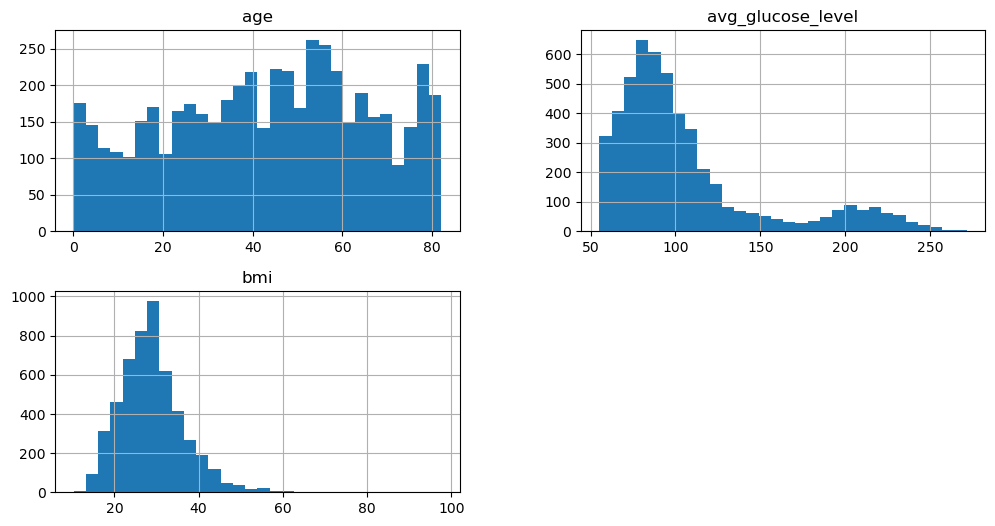

In [76]:
# Plot histograms for numerical features
df[['age', 'avg_glucose_level', 'bmi']].hist(bins=30, figsize=(12, 6))
plt.show()

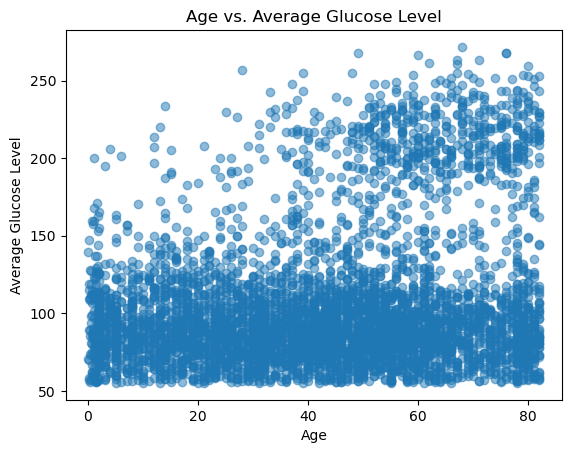

In [77]:
# Scatter plot for age vs. avg_glucose_level
plt.scatter(df['age'], df['avg_glucose_level'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs. Average Glucose Level')
plt.show()

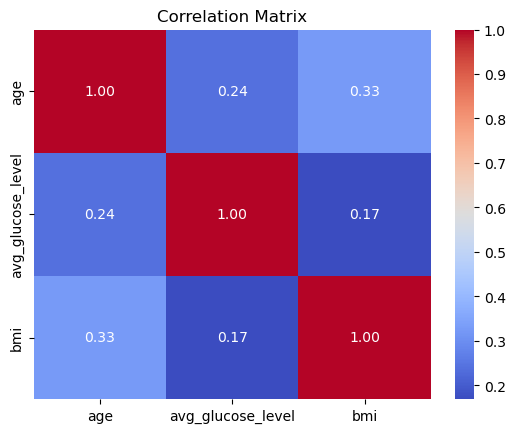

In [78]:
# Compute correlation matrix
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

- Histograms help visualize the distribution of numerical features like age, average glucose level, and BMI.
- Scatter plots reveal relationships between features, such as age and average glucose level.
- Correlation matrix heatmap shows how numerical features are correlated with each other.

## One-Hot Encoding Categorical Variables

In [79]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Check the new dataframe
print(df_encoded.head())

      id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0   9046  67.0             0              1             228.69  36.600000   
1  51676  61.0             0              0             202.21  28.893237   
2  31112  80.0             0              1             105.92  32.500000   
3  60182  49.0             0              0             171.23  34.400000   
4   1665  79.0             1              0             174.12  24.000000   

   stroke  gender_Female  gender_Male  gender_Other  ...  \
0       1          False         True         False  ...   
1       1           True        False         False  ...   
2       1          False         True         False  ...   
3       1           True        False         False  ...   
4       1           True        False         False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False     

- pd.get_dummies() creates binary columns for each category in the specified categorical features.
- This method is effective for converting categorical data into a format suitable for machine learning algorithms.

## Standardization

In [80]:
from sklearn.preprocessing import StandardScaler

# Define numerical features to scale
features = ['age', 'avg_glucose_level', 'bmi']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features
df_encoded[features] = scaler.fit_transform(df_encoded[features])

# Define features and target
X = df_encoded.drop(['id', 'stroke'], axis=1)
y = df_encoded['stroke']

In [81]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1.051434,0,1,2.706375,1.001234e+00,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
1,0.786070,0,0,2.121559,4.615554e-16,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
2,1.626390,0,1,-0.005028,4.685773e-01,False,True,False,False,True,...,False,True,False,False,True,False,False,False,True,False
3,0.255342,0,0,1.437358,7.154182e-01,True,False,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,1.582163,1,0,1.501184,-6.357112e-01,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,1,0,-0.494658,4.615554e-16,True,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
5106,1.670617,0,0,0.420775,1.442949e+00,True,False,False,False,True,...,False,False,True,False,False,True,False,False,True,False
5107,-0.363842,0,0,-0.511443,2.217363e-01,True,False,False,False,True,...,False,False,True,False,True,False,False,False,True,False
5108,0.343796,0,0,1.328257,-4.278451e-01,False,True,False,False,True,...,False,True,False,False,True,False,False,True,False,False


In [82]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

## Splitting the Dataset

In [83]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4088, 21) (4088,)
Testing set shape: (1022, 21) (1022,)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## Loading the Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model with chosen hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=30,          # Maximum depth of the trees
    min_samples_split=2,   # Minimum number of samples required to split a node
    min_samples_leaf=1,    # Minimum number of samples required at a leaf node
    criterion='entropy',   # Splitting criteria
    random_state=42        # For reproducibility
)

- Number of Trees (n_estimators): The number of trees in the forest. More trees generally improve performance but increase computation time. Common values range from 100 to 500.
- Maximum Depth (max_depth): The maximum depth of each tree. Limiting the depth can help prevent overfitting. Common values are between 10 and 50.
- Minimum Samples per Leaf (min_samples_leaf): The minimum number of samples required to be at a leaf node. Setting this parameter helps to control overfitting. Common values are between 1 and 10.
- Minimum Samples per Split (min_samples_split): The minimum number of samples required to split an internal node. This can also help to prevent overfitting. Common values are between 2 and 10.
- Splitting Criteria (criterion): The function to measure the quality of a split. Options include 'gini' for the Gini impurity and 'entropy' for the information gain.

# Train the model on the Training Data

In [85]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=200,
                       random_state=42)

## Make predictions on the Test Data

In [86]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Calculate evaluation metrics

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print metrics
print("\nAccuracy Score:", accuracy)
print("Precision Scores:", precision)
print("Recall Scores:", recall)
print("F1 Scores:", f1)


Accuracy Score: 0.9383561643835616
Precision Scores: [0.93927522 0.        ]
Recall Scores: [0.99895833 0.        ]
F1 Scores: [0.96819788 0.        ]


- Accuracy Score: Indicates the overall correctness of the model.
- Precision Scores: Show how many of the predicted positives are actually positive, useful for evaluating false positives.
- Recall Scores: Indicate how many of the actual positives were correctly identified, useful for evaluating false negatives.
- F1 Scores: Provide a single metric balancing precision and recall, especially useful when you have class imbalances.

## Confusion Matrix

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[959   1]
 [ 62   0]]


- Confusion Matrix: Shows the true positive, false positive, true negative, and false negative counts. This helps in understanding the types of errors made by the model.

## Classification Report

In [89]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



- Classification Report: Provides precision, recall, F1-score, and support for each class. Precision is the ratio of correctly predicted positive observations to the total predicted positives. Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all observations in the actual class. F1-score is the weighted average of Precision and Recall.

## Analyze Feature Importance


Feature Importances:
                            Feature  Importance
0                              age    0.294648
3                avg_glucose_level    0.225086
4                              bmi    0.206633
1                     hypertension    0.028278
2                    heart_disease    0.023636
19     smoking_status_never smoked    0.020536
12               work_type_Private    0.018841
16            Residence_type_Urban    0.018448
6                      gender_Male    0.018225
18  smoking_status_formerly smoked    0.017710
15            Residence_type_Rural    0.017231
17          smoking_status_Unknown    0.016597
13         work_type_Self-employed    0.016494
20           smoking_status_smokes    0.016488
5                    gender_Female    0.016265
9                 ever_married_Yes    0.014744
10              work_type_Govt_job    0.013433
8                  ever_married_No    0.011041
14              work_type_children    0.005624
11          work_type_Never_worked   

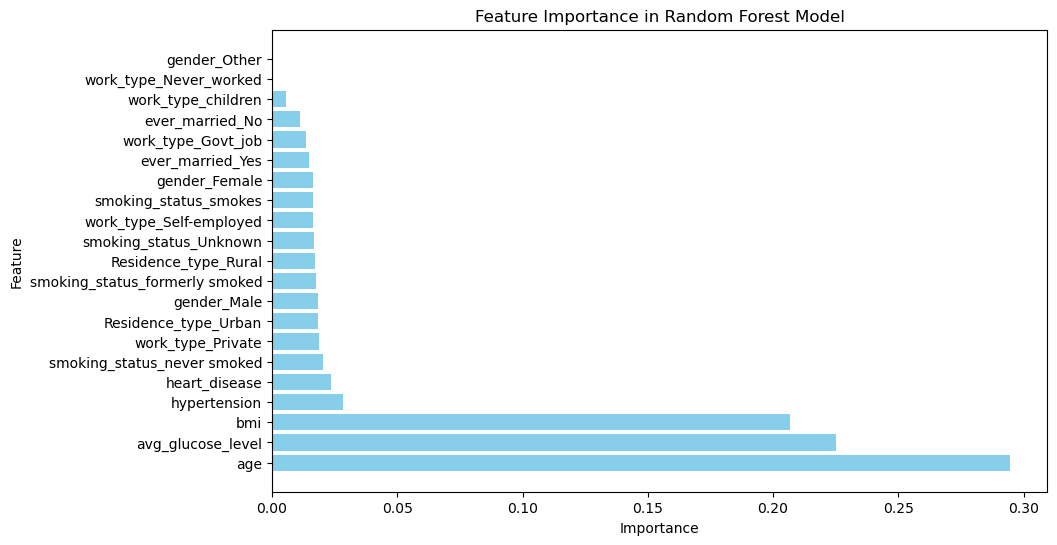

In [90]:
# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:\n", feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()

- Use feature_importances_ from the Random Forest model to understand which features are most impactful.
- This provides a ranking of features based on their contribution to the model’s predictions. Features with higher importance values have more influence on the outcome.
- Bar Plot: Visualizes the importance of each feature, making it easier to see which features are most and least significant.

## Hyperparameter Tuning with Grid Search

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Best model
best_rf_model = grid_search.best_estimator_

# Validate the best model on test data
from sklearn.metrics import classification_report, accuracy_score

y_pred_best = best_rf_model.predict(X_test)
print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9545013811038654
Confusion Matrix (Best Model):
 [[960   0]
 [ 62   0]]

Classification Report (Best Model):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Accuracy Score (Best Model): 0.9393346379647749


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Parameter Grid (param_grid): Define a dictionary where keys are hyperparameters to tune (max_depth, min_samples_leaf, criterion), and values are lists of possible values to try.
- GridSearchCV: Instantiate GridSearchCV with the DecisionTreeClassifier model (tree_clf), param_grid, cross-validation (cv=5), and scoring metric (scoring='accuracy').
- Fit Grid Search: Fit GridSearchCV on the training data (X_train, y_train) to find the best combination of hyperparameters.
- Best Parameters and Score: Print the best parameters found (grid_search.best_params_) and the corresponding cross-validation accuracy (grid_search.best_score_).
- Evaluate Optimized Model: Use the best model found (best_tree_clf) to predict on the test data (X_test) and evaluate its accuracy.

## Cross-Validation Techniques

In [92]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.95476773 0.95354523 0.95354523 0.95471236 0.95593635]
Mean Cross-Validation Score: 0.9545013811038654


- cross_val_score: Use cross_val_score to perform k-fold cross-validation (cv=5 by default) on the optimized model (best_tree_clf) and compute accuracy scores for each fold.

- Cross-validation Scores: Print the cross-validation scores for each fold (cv_scores) and compute the mean accuracy across all folds (cv_scores.mean()).

# Summary

- After tuning the Random Forest model with Grid Search, the best parameters yielded a score of 0.9545. The confusion matrix showed that the model predicted no instances of the positive class (stroke), leading to a precision of 0.00 for that class. The accuracy of 0.94 was largely due to the perfect prediction of the negative class (no stroke).
- Key features such as age, average glucose level, and BMI were identified as important, indicating their significant role in stroke prediction. Addressing the model's inability to predict the positive class will be crucial for improving overall performance.